In [3]:
##I want to analyze the impact of grade level, year, and race predict how well people do on the Newyork math exam. 
##Data Source: Catalog.Data.Gov, public data set for the city of Newyork

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r'C:\Users\Barb\NYSMathTestResults.csv', names=["DBN","Grade","Year","Category","Number_Tested",
"Mean_Scale_Score", "Level_1", "Level_1_%", "Level_2", "Level_2_%", "Level_3", "Level_3_%", "Level_4", "Level_4_%", "Level_3+4", "Level_3+4_%", "Asian", "Hispanic", "Black", "White" ])
df = df.iloc[1:,:]
print(df)

          DBN       Grade  Year  Category Number_Tested Mean_Scale_Score  \
1      01M015           3  2006     Asian             3              NaN   
2      01M015           3  2006     Black            12              662   
3      01M015           3  2006  Hispanic            24              670   
4      01M015           3  2007     Asian             3              NaN   
5      01M015           3  2007     Black             4              NaN   
...       ...         ...   ...       ...           ...              ...   
99417  75X723  All Grades  2010     White             7              NaN   
99418  75X186  All Grades  2011     White             2              NaN   
99419  75X188  All Grades  2011     White             1              NaN   
99420  75X352  All Grades  2011     White             2              NaN   
99421  75X723  All Grades  2011     White             6            613.0   

      Level_1 Level_1_% Level_2 Level_2_% Level_3 Level_3_% Level_4 Level_4_%  \
1     

C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\2317052728.py:5: DtypeWarning: Columns (2,4,5,7,9,11,13,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Barb\NYSMathTestResults.csv', names=["DBN","Grade","Year","Category","Number_Tested",


In [7]:
df

,DBN,Grade,Year,Category,Number_Tested,Mean_Scale_Score,Level_1,Level_1_%,Level_2,Level_2_%,Level_3,Level_3_%,Level_4,Level_4_%,Level_3+4,Level_3+4_%,Asian,Hispanic,Black,White
1,01M015,3,2006,Asian,3,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,1,0,0,0
2,01M015,3,2006,Black,12,662,0,0,3,25,9,75,0,0,9,75,0,0,1,0
3,01M015,3,2006,Hispanic,24,670,1,4.2,8,33.3,10,41.7,5,20.8,15,62.5,0,1,0,0
4,01M015,3,2007,Asian,3,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,1,0,0,0
5,01M015,3,2007,Black,4,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99417,75X723,All Grades,2010,White,7,NaN,4,57.1,1,14.3,2,28.6,0,0.0,2,28.6,0,0,0,1
99418,75X186,All Grades,2011,White,2,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,0,0,0,1
99419,75X188,All Grades,2011,White,1,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,0,0,0,1
99420,75X352,All Grades,2011,White,2,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,0,0,0,1


In [8]:
df.describe()

,DBN,Grade,Year,Category,Number_Tested,Mean_Scale_Score,Level_1,Level_1_%,Level_2,Level_2_%,Level_3,Level_3_%,Level_4,Level_4_%,Level_3+4,Level_3+4_%,Asian,Hispanic,Black,White
count,99421,99421,99421,99421,99421,56477.0,99421,72796.0,99421,72796.0,99421,72796.0,99421,72796.0,99421,72796.0,99421,99421,99421,99421
unique,1132,7,12,4,1391,378.0,204,1210.0,373,1451.0,473,1732.0,362,1839.0,647,1930.0,4,4,4,4
top,11X089,All Grades,2011,Hispanic,1,675.0,s,0.0,s,0.0,s,50.0,s,0.0,s,100.0,0,0,0,0
freq,168,24500,11455,28173,5928,717.0,26625,16574.0,26625,5472.0,26625,2161.0,26625,5973.0,26625,4432.0,52437,47668,48506,51351


In [9]:
## Removing of All Grades because they are agregated rows.
newdf = df[(df.Grade != "All Grades")]
print(newdf)
newdf

          DBN Grade  Year  Category Number_Tested Mean_Scale_Score Level_1  \
1      01M015     3  2006     Asian             3              NaN       s   
2      01M015     3  2006     Black            12              662       0   
3      01M015     3  2006  Hispanic            24              670       1   
4      01M015     3  2007     Asian             3              NaN       s   
5      01M015     3  2007     Black             4              NaN       s   
...       ...   ...   ...       ...           ...              ...     ...   
99393  75X723     8  2010  Hispanic            16            585.0      14   
99394  75X723     8  2010     White             1              NaN       s   
99395  75X723     8  2011     Asian             2              NaN       s   
99396  75X723     8  2011     Black            12            590.0       8   
99397  75X723     8  2011  Hispanic            18            602.0      14   

      Level_1_% Level_2 Level_2_% Level_3 Level_3_% Level_4 Lev

,DBN,Grade,Year,Category,Number_Tested,Mean_Scale_Score,Level_1,Level_1_%,Level_2,Level_2_%,Level_3,Level_3_%,Level_4,Level_4_%,Level_3+4,Level_3+4_%,Asian,Hispanic,Black,White
1,01M015,3,2006,Asian,3,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,1,0,0,0
2,01M015,3,2006,Black,12,662,0,0,3,25,9,75,0,0,9,75,0,0,1,0
3,01M015,3,2006,Hispanic,24,670,1,4.2,8,33.3,10,41.7,5,20.8,15,62.5,0,1,0,0
4,01M015,3,2007,Asian,3,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,1,0,0,0
5,01M015,3,2007,Black,4,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99393,75X723,8,2010,Hispanic,16,585.0,14,87.5,2,12.5,0,0.0,0,0.0,0,0.0,0,1,0,0
99394,75X723,8,2010,White,1,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,0,0,0,1
99395,75X723,8,2011,Asian,2,NaN,s,NaN,s,NaN,s,NaN,s,NaN,s,NaN,1,0,0,0
99396,75X723,8,2011,Black,12,590.0,8,66.7,4,33.3,0,0.0,0,0.0,0,0.0,0,0,1,0


In [10]:
## dataframe = to all suppresed rows
sdf = newdf[(newdf.Level_1 == "s")]
print(sdf)

          DBN Grade  Year Category Number_Tested Mean_Scale_Score Level_1  \
1      01M015     3  2006    Asian             3              NaN       s   
4      01M015     3  2007    Asian             3              NaN       s   
5      01M015     3  2007    Black             4              NaN       s   
7      01M015     3  2007    White             1              NaN       s   
8      01M015     3  2008    Asian             1              NaN       s   
...       ...   ...   ...      ...           ...              ...     ...   
99387  75X723     8  2009    Asian             2              NaN       s   
99390  75X723     8  2009    White             1              NaN       s   
99391  75X723     8  2010    Asian             1              NaN       s   
99394  75X723     8  2010    White             1              NaN       s   
99395  75X723     8  2011    Asian             2              NaN       s   

      Level_1_% Level_2 Level_2_% Level_3 Level_3_% Level_4 Level_4_%  \
1 

In [11]:
##aggregate of suppresed rows
sdf1 = sdf.groupby(['Category'])['Category'].count()
print(sdf1)

Category
Asian       7787
Black       4016
Hispanic    2189
White       7838
Name: Category, dtype: int64


In [12]:
##dataframe without suppressed rows
df1 = newdf[(newdf.Level_1 != "s")]
print(df1)

          DBN Grade  Year  Category Number_Tested Mean_Scale_Score Level_1  \
2      01M015     3  2006     Black            12              662       0   
3      01M015     3  2006  Hispanic            24              670       1   
6      01M015     3  2007  Hispanic            23              678       0   
9      01M015     3  2008     Black             8              652       0   
10     01M015     3  2008  Hispanic            27              671       0   
...       ...   ...   ...       ...           ...              ...     ...   
99389  75X723     8  2009  Hispanic            15            601.0       9   
99392  75X723     8  2010     Black            19            607.0      15   
99393  75X723     8  2010  Hispanic            16            585.0      14   
99396  75X723     8  2011     Black            12            590.0       8   
99397  75X723     8  2011  Hispanic            18            602.0      14   

      Level_1_% Level_2 Level_2_% Level_3 Level_3_% Level_4 Lev

In [13]:
df1.describe()
# You can see there are no more null values

,DBN,Grade,Year,Category,Number_Tested,Mean_Scale_Score,Level_1,Level_1_%,Level_2,Level_2_%,Level_3,Level_3_%,Level_4,Level_4_%,Level_3+4,Level_3+4_%,Asian,Hispanic,Black,White
count,53091,53091,53091,53091,53091,53091.0,53091,53091.0,53091,53091.0,53091,53091.0,53091,53091.0,53091,53091.0,53091,53091,53091,53091
unique,1122,6,12,4,727,378.0,117,1099.0,202,1425.0,248,1685.0,189,1715.0,334,1869.0,4,4,4,4
top,11X089,3,2011,Hispanic,6,675.0,0,0.0,0,0.0,5,50.0,0,0.0,6,100.0,0,0,0,0
freq,144,10707,6194,19526,1440,649.0,19393,13425.0,6628,4515.0,2876,1732.0,7718,4949.0,2337,3672.0,29603,23642,25152,29819


In [14]:
df1["Year"] = df1["Year"].astype(float)


C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\2188968644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Year"] = df1["Year"].astype(float)


In [15]:
df1["Grade"] = df1["Grade"].astype(float)


C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\4218225943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Grade"] = df1["Grade"].astype(float)


In [20]:
df1["Level_4"] = df1["Level_4"].astype(float)
df1["White"] = df1["White"].astype(float)
df1["Black"] = df1["Black"].astype(float)
df1["Hispanic"] = df1["Hispanic"].astype(float)
df1["Asian"] = df1["Asian"].astype(float)


C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\294779244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Level_4"] = df1["Level_4"].astype(float)
C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\294779244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["White"] = df1["White"].astype(float)
C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\294779244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [21]:
df1["Mean_Scale_Score"] = df1["Mean_Scale_Score"].astype(float)


C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\3221611106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Mean_Scale_Score"] = df1["Mean_Scale_Score"].astype(float)


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53091 entries, 2 to 99397
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DBN               53091 non-null  object 
 1   Grade             53091 non-null  float64
 2   Year              53091 non-null  float64
 3   Category          53091 non-null  object 
 4   Number_Tested     53091 non-null  object 
 5   Mean_Scale_Score  53091 non-null  float64
 6   Level_1           53091 non-null  object 
 7   Level_1_%         53091 non-null  object 
 8   Level_2           53091 non-null  object 
 9   Level_2_%         53091 non-null  object 
 10  Level_3           53091 non-null  object 
 11  Level_3_%         53091 non-null  object 
 12  Level_4           53091 non-null  float64
 13  Level_4_%         53091 non-null  object 
 14  Level_3+4         53091 non-null  object 
 15  Level_3+4_%       53091 non-null  object 
 16  Asian             53091 non-null  float6

In [39]:
X = df1[['Black', 'White', 'Hispanic', 'Asian']]
y = df1[['Level_4_%']]

import seaborn as sns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

In [40]:
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [41]:
reg = LinearRegression() 
reg.fit(X_train, y_train) 

print(reg.coef_)
print(reg.intercept_)


[[8.43811411e+12 8.43811411e+12 8.43811411e+12 8.43811411e+12]]
[-8.43811411e+12]


In [42]:
#root mean squared error (RMSE) from Linear Regression
y_pred = reg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

16.660560133957496


In [66]:
reg.score(X_test,y_test)

C:\Users\Barb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.3944665256337382

In [59]:
XX = X.values.reshape(-1, len(features))
yy = y.values
features = ['Black', 'White', 'Hispanic', 'Asian']
model = reg.fit(XX,yy)
X_pred = np.array([1,0,0,0])
X_pred = X_pred.reshape(-1,len(features))
model.predict(X_pred)
#fig, ax = plt.subplots(figsize=(20,40))
#ax.plot(X_pred, y_pred)

array([[12.07424927]])

In [60]:
X_pred = np.array([0,1,0,0])
X_pred = X_pred.reshape(-1,len(features))
model.predict(X_pred)

array([[35.66604614]])

In [61]:
X_pred = np.array([0,0,1,0])
X_pred = X_pred.reshape(-1,len(features))
model.predict(X_pred)

array([[15.43966675]])

In [62]:
X_pred = np.array([0,0,0,1])
X_pred = X_pred.reshape(-1,len(features))
model.predict(X_pred)

array([[47.93911743]])

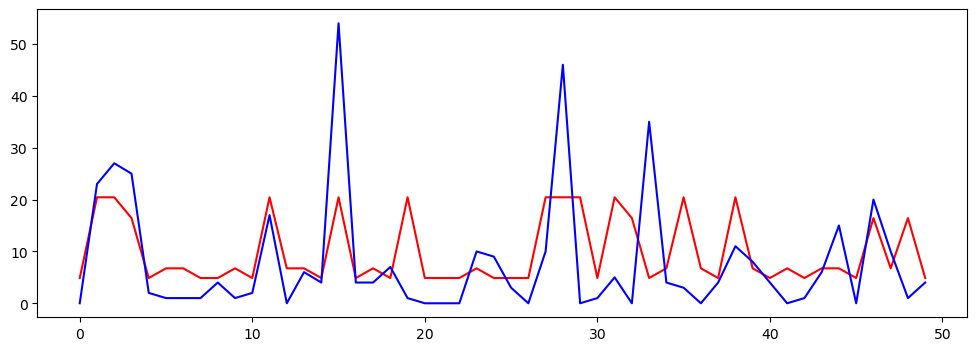

In [29]:
x = np.arange(50)

plt.rcParams["figure.figsize"] = (12,4)
plt.plot(x, y_pred[:50], c = "red")
plt.plot(x, y_test[:50], c = "blue")
plt.show()

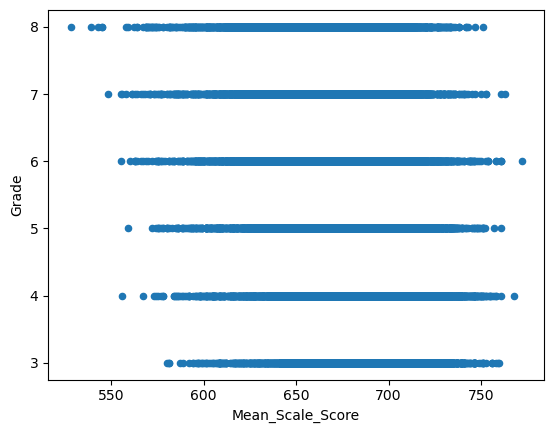

In [270]:
df1.plot.scatter('Mean_Scale_Score','Grade')
plt.show()

In [114]:
dfwhite = df1[(df1.Category == "White")]
dfblack = df1[(df1.Category == "Black")]
dfhispanic = df1[(df1.Category == "Hispanic")]
dfasian = df1[(df1.Category == "Asian")]


C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\1539179161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwhite["Level_4_%"] = df1["Level_4_%"].astype(float)
C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\1539179161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfasian["Level_4_%"] = df1["Level_4_%"].astype(float)
C:\Users\Barb\AppData\Local\Temp\ipykernel_11348\1539179161.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

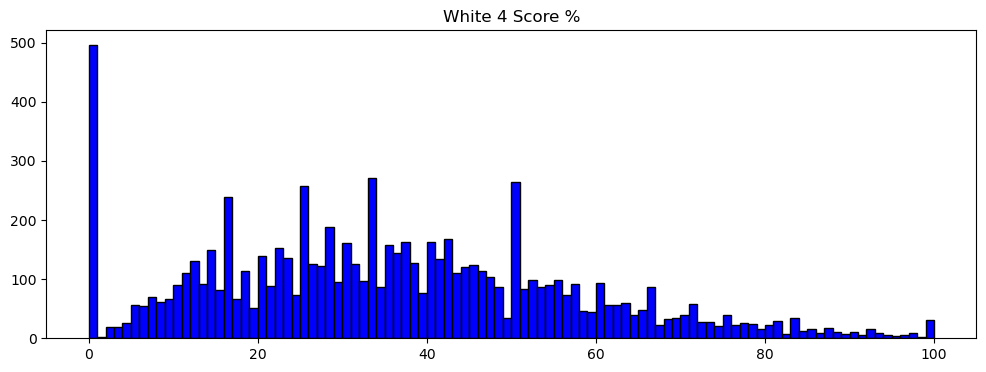

In [115]:
dfwhite["Level_4_%"] = df1["Level_4_%"].astype(float)
dfasian["Level_4_%"] = df1["Level_4_%"].astype(float)
dfhispanic["Level_4_%"] = df1["Level_4_%"].astype(float)
dfblack["Level_4_%"] = df1["Level_4_%"].astype(float)
dfwhite["Level_1_%"] = df1["Level_4_%"].astype(float)
dfasian["Level_1_%"] = df1["Level_4_%"].astype(float)
dfhispanic["Level_1_%"] = df1["Level_4_%"].astype(float)
dfblack["Level_1_%"] = df1["Level_4_%"].astype(float)
dfhispanic["Level_3+4_%"] = df1["Level_4_%"].astype(float)
dfblack["Level_3+4_%"] = df1["Level_4_%"].astype(float)
dfhispanic["Level_2_%"] = df1["Level_4_%"].astype(float)
dfblack["Level_2_%"] = df1["Level_4_%"].astype(float)
dfhispanic["Level_3_%"] = df1["Level_4_%"].astype(float)
dfblack["Level_3_%"] = df1["Level_4_%"].astype(float)


plt.hist(dfwhite['Level_4_%'], bins=100, color = 'blue', edgecolor= 'black')
plt.title('White 4 Score %')

plt.show()

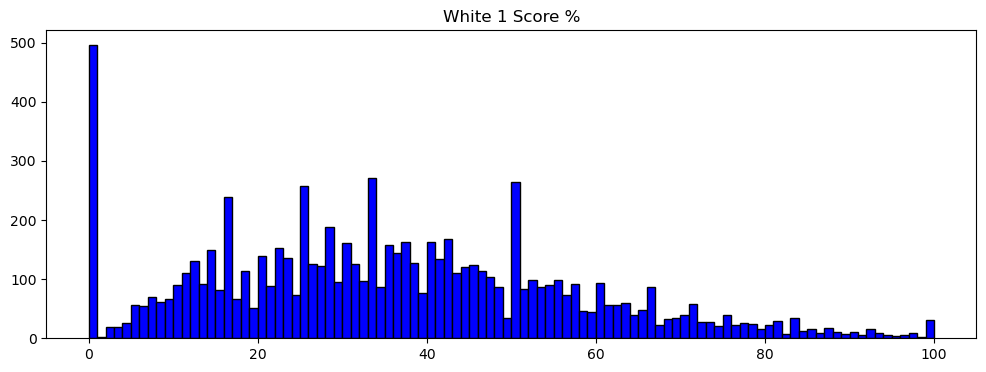

In [324]:
plt.hist(dfwhite['Level_1_%'], bins=100, color = 'blue', edgecolor= 'black')
plt.title('White 1 Score %')
plt.show()

In [113]:
plt.hist(dfblack['Level_4_%'], bins=100, color = 'red', edgecolor= 'black')
plt.title('Black 4 Score %')
plt.show()

NameError: name 'dfblack' is not defined

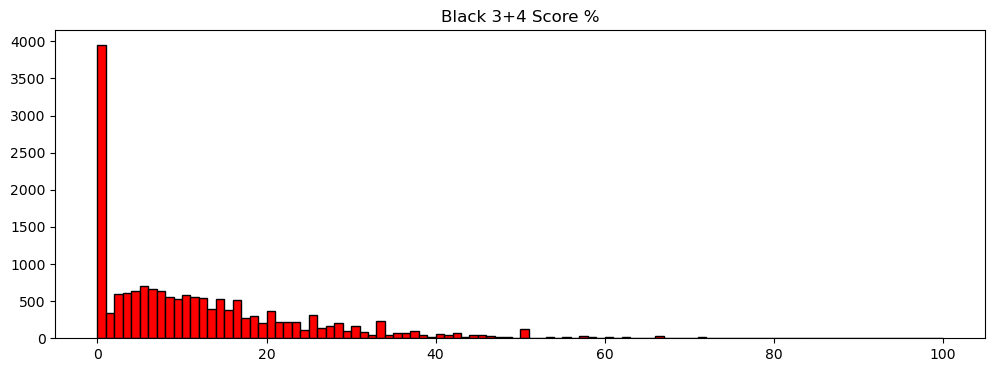

In [326]:
plt.hist(dfblack['Level_3+4_%'], bins=100, color = 'red', edgecolor= 'black')
plt.title('Black 3+4 Score %')
plt.show()

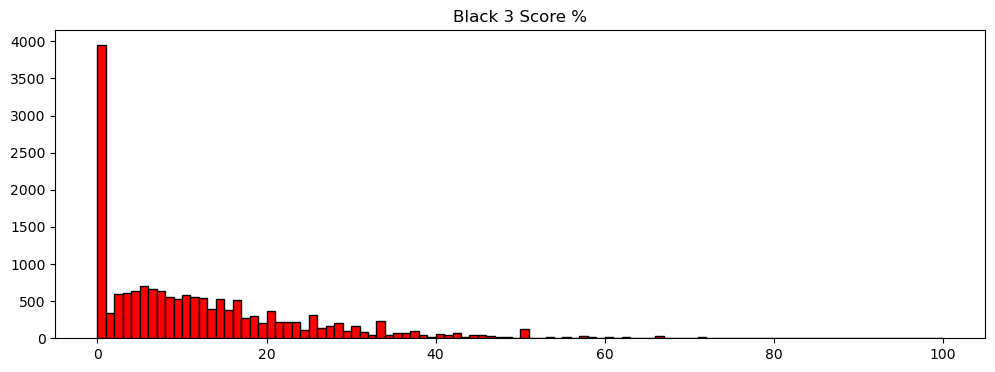

In [116]:
plt.hist(dfblack['Level_3_%'], bins=100, color = 'red', edgecolor= 'black')
plt.title('Black 3 Score %')
plt.show()

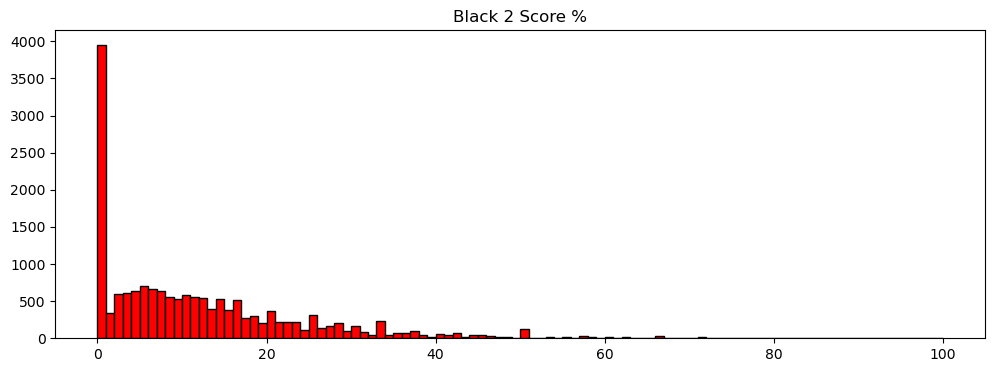

In [117]:
plt.hist(dfblack['Level_2_%'], bins=100, color = 'red', edgecolor= 'black')
plt.title('Black 2 Score %')
plt.show()

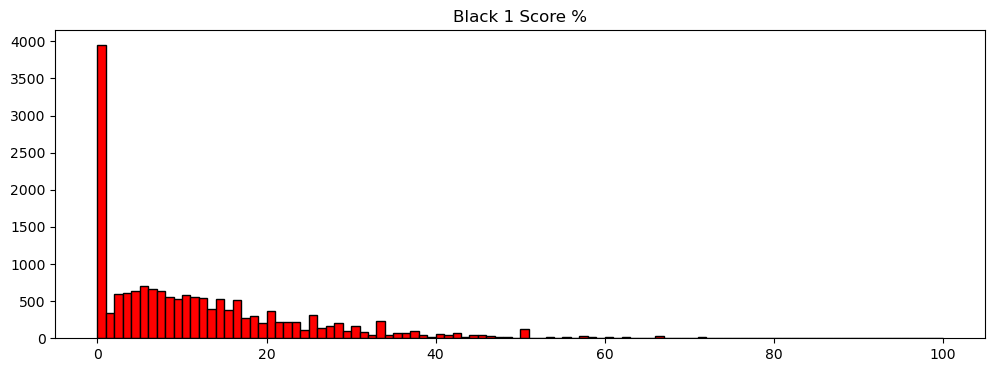

In [329]:
plt.hist(dfblack['Level_1_%'], bins=100, color = 'red', edgecolor= 'black')
plt.title('Black 1 Score %')
plt.show()

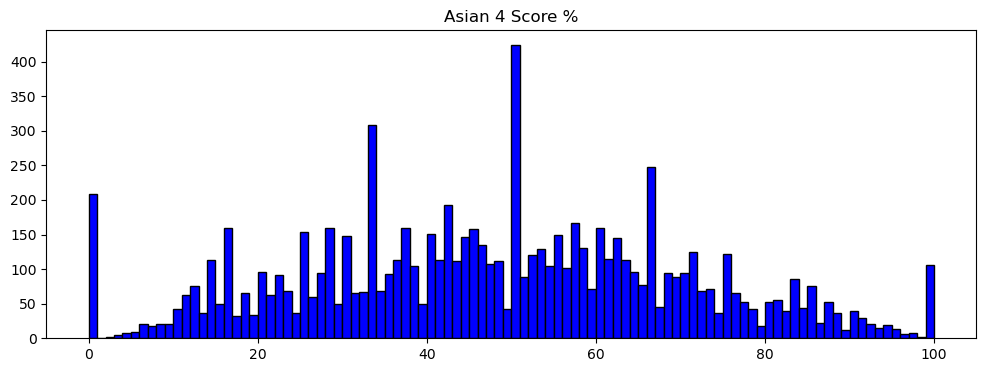

In [118]:
plt.hist(dfasian['Level_4_%'], bins=100, color = 'blue', edgecolor= 'black')
plt.title('Asian 4 Score %')
plt.show()

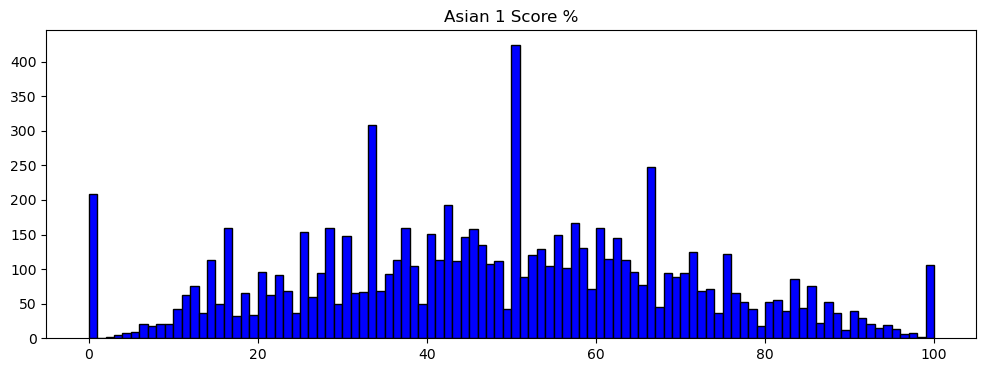

In [119]:
plt.hist(dfasian['Level_1_%'], bins=100, color = 'blue', edgecolor= 'black')
plt.title('Asian 1 Score %')
plt.show()

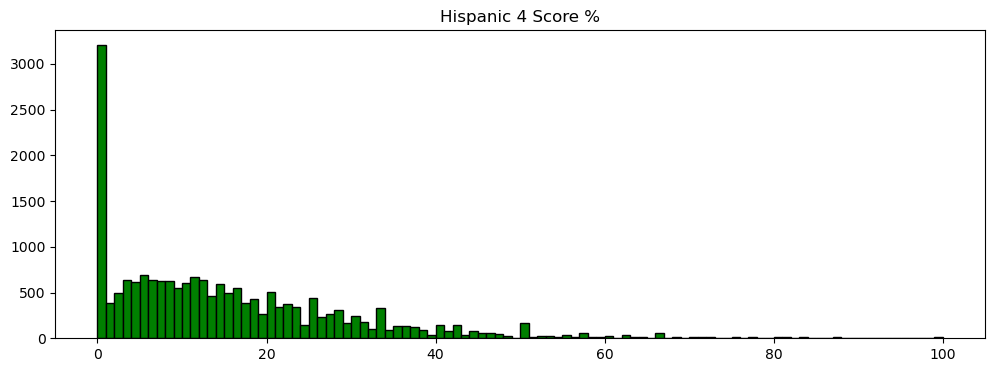

In [332]:
plt.hist(dfhispanic['Level_4_%'], bins=100, color = 'green', edgecolor= 'black')
plt.title('Hispanic 4 Score %')
plt.show()

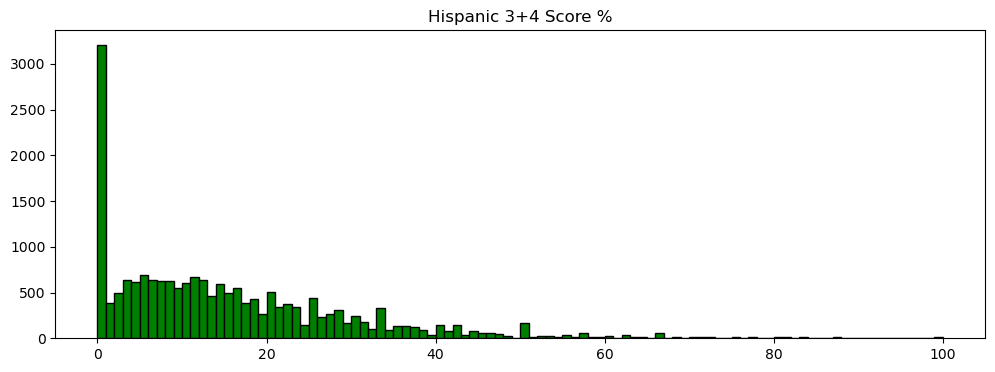

In [333]:
plt.hist(dfhispanic['Level_3+4_%'], bins=100, color = 'green', edgecolor= 'black')
plt.title('Hispanic 3+4 Score %')
plt.show()

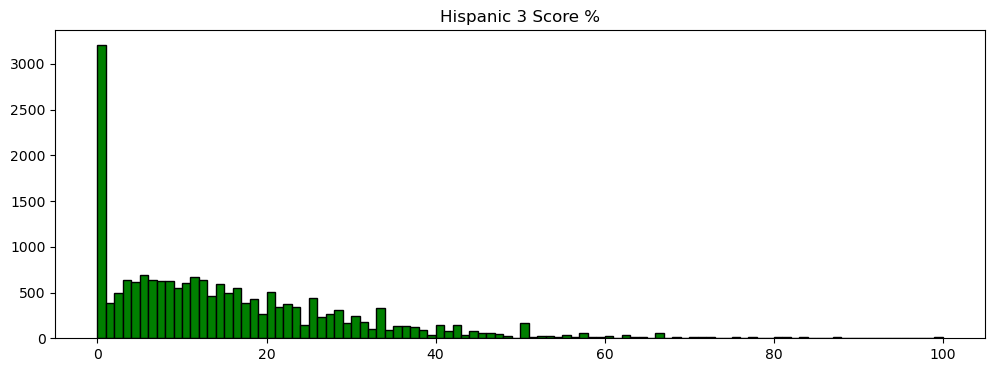

In [334]:
plt.hist(dfhispanic['Level_3_%'], bins=100, color = 'green', edgecolor= 'black')
plt.title('Hispanic 3 Score %')
plt.show()

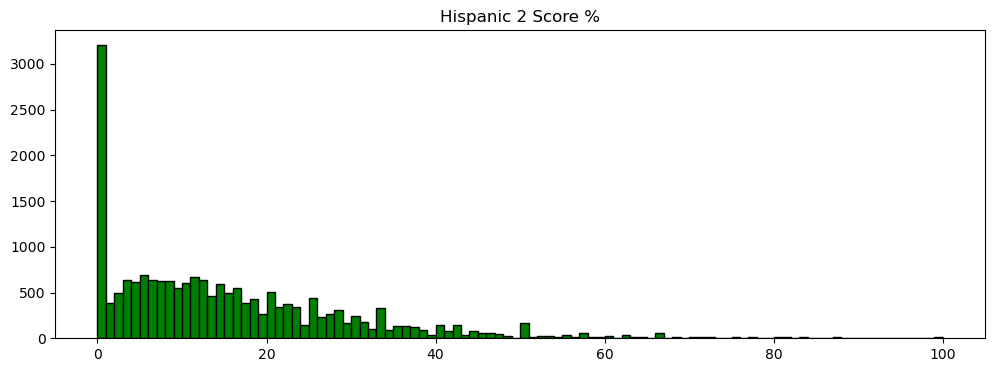

In [335]:
plt.hist(dfhispanic['Level_2_%'], bins=100, color = 'green', edgecolor= 'black')
plt.title('Hispanic 2 Score %')
plt.show()

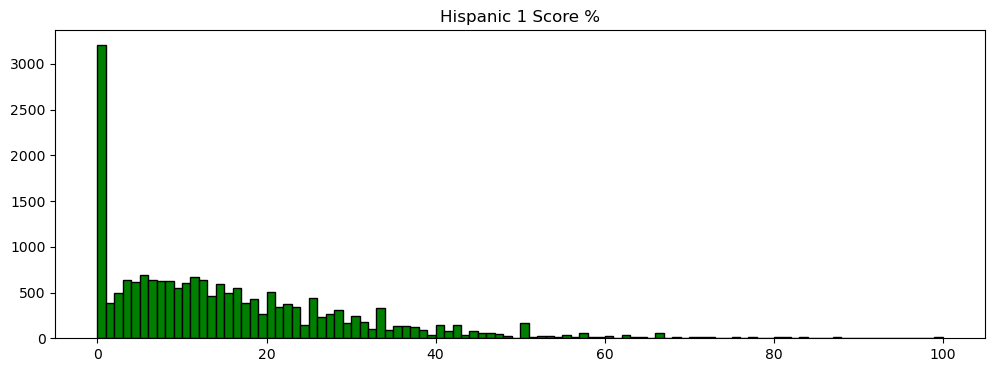

In [336]:
plt.hist(dfhispanic['Level_1_%'], bins=100, color = 'green', edgecolor= 'black')
plt.title('Hispanic 1 Score %')
plt.show()

In [109]:
X = df1[['Year','Grade','Black','White','Hispanic','Asian']]
y = df1[['Mean_Scale_Score']]

import seaborn as sns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=123)

In [110]:
reg = LinearRegression() 
reg.fit(X_train, y_train) 

print(reg.coef_)
print(reg.intercept_)

reg.score(X_test,y_test)

[[  4.27576306  -4.82193788 -16.28524137   8.92714168 -12.07926169
   19.43736137]]
[-7882.8891821]


0.4757815516497643

In [ ]:
## This dataset took a lot of cleaning up to use but it did find that a higher percent of Asians score higher on the testing done in New York schools